# Choropleth classification schemes from PySAL for use with GeoPandas
<img src="http://pysal.readthedocs.io/en/latest/_static/images/socal_3.jpg" width="200" align="right" alt="PySAL image" title="PySAL image">
PySAL is a [Spatial Analysis Library](), which packages fast spatial algorithms used in various fields. These include Exploratory spatial data analysis, spatial inequality analysis, spatial analysis on networks, spatial dynamics, and many more.

It is used under the hood in geopandas when plotting measures with a set of colors. There are many ways to classify data into different bins, depending on a number of classification schemes.

<img src="http://alumni.media.mit.edu/~tpminka/courses/36-350.2001/lectures/day11/boston-kmeans.png" width="300">

For example, if we have 20 countries whose average annual temperature varies between 5C and 25C, we can classify them in 4 bins by:
* Quantiles
    - Separates the rows into equal parts, 5 countries per bin.
* Equal Intervals
    - Separates the measure's interval into equal parts, 5C per bin.
* Natural Breaks (Fischer Jenks)
    - This algorithm tries to split the rows into naturaly occurring clusters. The numbers per bin will depend on how the observations are located on the interval.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# We use a PySAL example shapefile
import libpysal as ps

pth = ps.examples.get_path("columbus.shp")
tracts = gpd.GeoDataFrame.from_file(pth)
print('Observations, Attributes:',tracts.shape)
tracts.head()

Observations, Attributes: (49, 21)


,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,...,DISCBD,X,Y,NSA,NSB,EW,CP,THOUS,NEIGNO,geometry
0,0.309441,2.440629,2,5,1,5,80.467003,19.531,15.725980,2.850747,...,5.03,38.799999,44.070000,1.0,1.0,1.0,0.0,1000.0,1005.0,"POLYGON ((8.62413 14.23698, 8.55970 14.74245, ..."
1,0.259329,2.236939,3,1,2,1,44.567001,21.232,18.801754,5.296720,...,4.27,35.619999,42.380001,1.0,1.0,0.0,0.0,1000.0,1001.0,"POLYGON ((8.25279 14.23694, 8.28276 14.22994, ..."
2,0.192468,2.187547,4,6,3,6,26.350000,15.956,30.626781,4.534649,...,3.89,39.820000,41.180000,1.0,1.0,1.0,0.0,1000.0,1006.0,"POLYGON ((8.65331 14.00809, 8.81814 14.00205, ..."
3,0.083841,1.427635,5,2,4,2,33.200001,4.477,32.387760,0.394427,...,3.70,36.500000,40.520000,1.0,1.0,0.0,0.0,1000.0,1002.0,"POLYGON ((8.45950 13.82035, 8.47341 13.83227, ..."
4,0.488888,2.997133,6,7,5,7,23.225000,11.252,50.731510,0.405664,...,2.83,40.009998,38.000000,1.0,1.0,1.0,0.0,1000.0,1007.0,"POLYGON ((8.68527 13.63952, 8.67758 13.72221, ..."


## Plotting the CRIME variable
In this example, we are taking a look at neighbourhood-level statistics for the city of Columbus, OH. We'd like to have an idea of how the crime rate variable is distributed around the city.

From the [shapefile's metadata](https://github.com/pysal/pysal/blob/master/pysal/examples/columbus/columbus.html):
>**CRIME**: residential burglaries and vehicle thefts per 1000 households

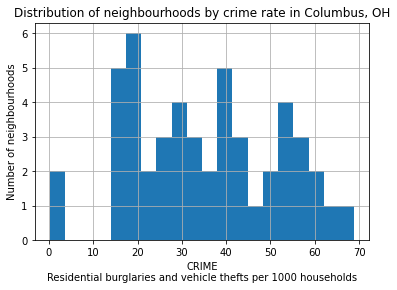

In [3]:
# Let's take a look at how the CRIME variable is distributed with a histogram
tracts['CRIME'].hist(bins=20)
plt.xlabel('CRIME\nResidential burglaries and vehicle thefts per 1000 households')
plt.ylabel('Number of neighbourhoods')
plt.title('Distribution of neighbourhoods by crime rate in Columbus, OH')
plt.show()

Now let's see what it looks like without a classification scheme:

<AxesSubplot:>

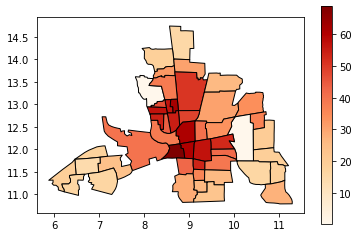

In [4]:
tracts.plot(column='CRIME', cmap='OrRd', edgecolor='k', legend=True)

All the 49 neighbourhoods are colored along a white-to-dark-red gradient, but the human eye can have a hard time comparing the color of shapes that are distant one to the other. In this case, it is especially hard to rank the peripheral districts colored in beige.

Instead, we'll classify them in color bins.

## Classification by quantiles
>QUANTILES will create attractive maps that place an equal number of observations in each class: If you have 30 counties and 6 data classes, you’ll have 5 counties in each class. The problem with quantiles is that you can end up with classes that have very different numerical ranges (e.g., 1-4, 4-9, 9-250).

<AxesSubplot:>

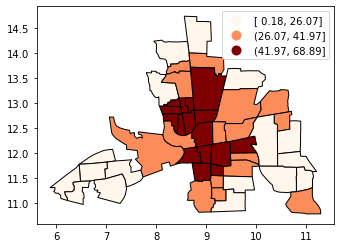

In [5]:
# Splitting the data in three shows some spatial clustering around the center
tracts.plot(column='CRIME', scheme='quantiles', k=3, cmap='OrRd', edgecolor='k', legend=True)

<AxesSubplot:>

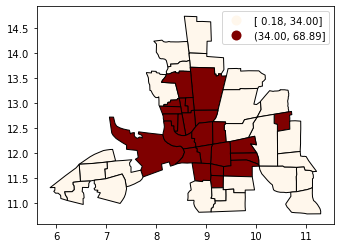

In [6]:
# We can also see where the top and bottom halves are located
tracts.plot(column='CRIME', scheme='quantiles', k=2, cmap='OrRd', edgecolor='k', legend=True)

## Classification by equal intervals
>EQUAL INTERVAL divides the data into equal size classes (e.g., 0-10, 10-20, 20-30, etc.) and works best on data that is generally spread across the entire range. CAUTION: Avoid equal interval if your data are skewed to one end or if you have one or two really large outlier values.

<AxesSubplot:>

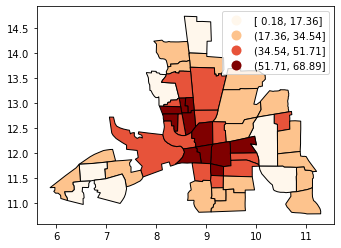

In [7]:
tracts.plot(column='CRIME', scheme='equal_interval', k=4, cmap='OrRd', edgecolor='k', legend=True)

<AxesSubplot:>

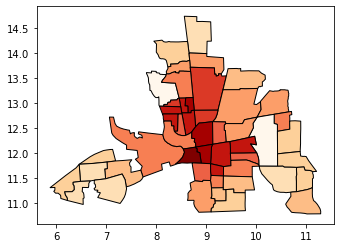

In [8]:
# No legend here as we'd be out of space
tracts.plot(column='CRIME', scheme='equal_interval', k=12, cmap='OrRd', edgecolor='k')

## Classificaton by natural breaks
>NATURAL BREAKS is a kind of “optimal” classification scheme that finds class breaks that will minimize within-class variance and maximize between-class differences. One drawback of this approach is each dataset generates a unique classification solution, and if you need to make comparison across maps, such as in an atlas or a series (e.g., one map each for 1980, 1990, 2000) you might want to use a single scheme that can be applied across all of the maps.

<AxesSubplot:>

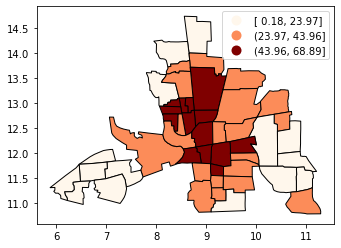

In [9]:
# Compare this to the previous 3-bin figure with quantiles
tracts.plot(column='CRIME', scheme='fisher_jenks', k=3, cmap='OrRd', edgecolor='k', legend=True)

## Other classification schemes in PySAL

Geopandas includes only the most used classifiers found in PySAL. In order to use the others, you will need to add them as additional columns to your GeoDataFrame.

>The max-p algorithm determines the number of regions (p) endogenously based on a set of areas, a matrix of attributes on each area and a floor constraint. The floor constraint defines the minimum bound that a variable must reach for each region; for example, a constraint might be the minimum population each region must have. max-p further enforces a contiguity constraint on the areas within regions.

In [10]:
def max_p(values, k):
    """
    Given a list of values and `k` bins,
    returns a list of their Maximum P bin number.
    """
    from mapclassify import MaxP
    binning = MaxP(values, k=k)
    return binning.yb

tracts['Max_P'] = max_p(tracts['CRIME'].values, k=5)
tracts.head()

,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,...,X,Y,NSA,NSB,EW,CP,THOUS,NEIGNO,geometry,Max_P
0,0.309441,2.440629,2,5,1,5,80.467003,19.531,15.725980,2.850747,...,38.799999,44.070000,1.0,1.0,1.0,0.0,1000.0,1005.0,"POLYGON ((8.62413 14.23698, 8.55970 14.74245, ...",0
1,0.259329,2.236939,3,1,2,1,44.567001,21.232,18.801754,5.296720,...,35.619999,42.380001,1.0,1.0,0.0,0.0,1000.0,1001.0,"POLYGON ((8.25279 14.23694, 8.28276 14.22994, ...",0
2,0.192468,2.187547,4,6,3,6,26.350000,15.956,30.626781,4.534649,...,39.820000,41.180000,1.0,1.0,1.0,0.0,1000.0,1006.0,"POLYGON ((8.65331 14.00809, 8.81814 14.00205, ...",2
3,0.083841,1.427635,5,2,4,2,33.200001,4.477,32.387760,0.394427,...,36.500000,40.520000,1.0,1.0,0.0,0.0,1000.0,1002.0,"POLYGON ((8.45950 13.82035, 8.47341 13.83227, ...",2
4,0.488888,2.997133,6,7,5,7,23.225000,11.252,50.731510,0.405664,...,40.009998,38.000000,1.0,1.0,1.0,0.0,1000.0,1007.0,"POLYGON ((8.68527 13.63952, 8.67758 13.72221, ...",3


<AxesSubplot:>

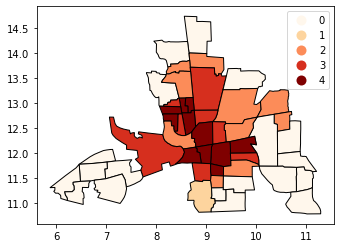

In [11]:
tracts.plot(column='Max_P', cmap='OrRd', edgecolor='k', categorical=True, legend=True)